In [1]:
import numpy as np 
from matplotlib import pyplot as plt

In [9]:
import sys
sys.path.append('../')
# autorskie ploty :P
from plots import barplot

### recall @5,10,15

-1.0


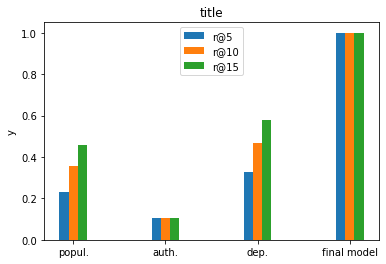

In [13]:
y = [[0.2321,0.1067,0.3281,1],[0.3575,0.1075,0.4654,1],[0.4595,0.1075,0.5773,1]]
x_names = ['popul.','auth.','dep.','final model']
bar_names = ['r@5','r@10','r@15']
barplot(y,x_names,bar_names)


### precision @5,10,15

In [ ]:
y = [[0.0464,0.0213,0.0656,4],[0.0357,0.0107,0.0465,4.1],[0.0306,0.0071,0.0385,1]]
bar_names = ['p@5','p@10','p@15']
barplot(y,x_names,bar_names)
